# Customer Analytics

**Goal**: Using Analytics, we can predict behavior on customers. We can analyze all relevant data and develop focused customer retention programs to gain a competitive market edge. For this project we will analyze IBM watson analytics customer data, in order to understand customer demographics and buying behavior. We will use predictive analytics to analyze the ost profitable cutomers and how they interact, and in the end take target actions to increase profitable customer response, retention, and growth. 

**Introduction**: The importance of customer analytics is cruical to any business. It is critical for many businesses to be able to understand and predict what their customers are likley to purchase or view. The more a business understands about the customer, the better competitve power it will have against its competitors. 



## Load Data

The data set is available from IBM site: https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/


In [8]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.shape

(9134, 24)

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Analyzing Engaged Customers

We want to analyze and understand how different customers behave ad react to different marketing strategies 

### Overall Engagement Rate

The response column indicates whether a customer responded to the marketing strategy. 


In [6]:
#total number of customers who have responded
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

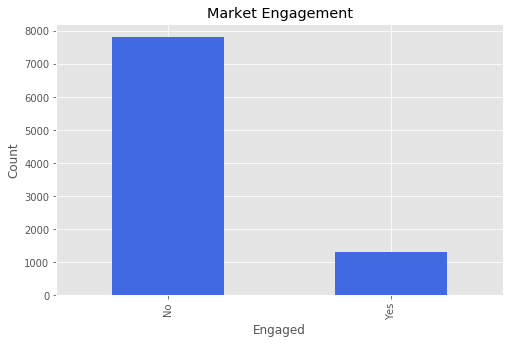

In [15]:
ax = df.groupby('Response').count()['Customer'].plot(kind='bar',
                                                    color='royalblue',
                                                    figsize=(8,5),
                                                    title='Market Engagement')
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()



In [16]:
#percentage of engage vs non-engaged

df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From our plot and calculations we can see that only 14% of customers responded to the marketing calls.

### Engagement Rates by Offer Type

The Renew Offer Type column contains the type of the renewal offer presented to the customers. We want to look at what type of offers worked best for our engaged customers.

In [31]:
#get the engagement rates per renewal offer type

bot_df = df.loc[df['Response']== 'Yes', #count only engaged customers
               ].groupby([
                'Renew Offer Type' #engage customers grouped by renewal offer type
                ]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']# engaged customers grouped by renewal offer type]) 

In [32]:
bot_df


Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

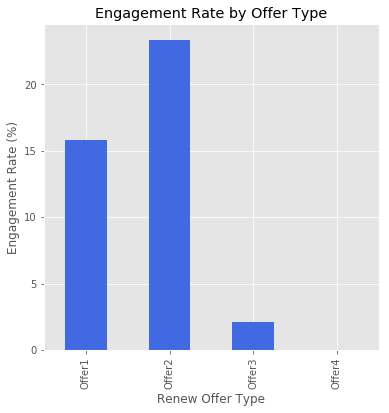

In [37]:
ax1 = (bot_df*100.0).plot(kind='bar',
                          figsize=(6,6),
                         color='royalblue',
                         title='Engagement Rate by Offer Type')
ax1.set_ylabel('Engagement Rate (%)')
plt.show()

**Offer 2** has the highest engagement rate among customers